<h1>1. 骰子题</h1>

投掷n个骰子, 骰子的面的总和是S。给定n，找到S的所有可能值及其概率。

In [ ]:
def Roll(face,num):
    aa = [x+1 for x in range(face)]
    if num == 1:
        return aa
    if num > 1:
        return (x+y for x in aa for y in Roll(face,num-1))

def chance(face,num):
    aa = Roll(face,num)
    probability = {}
    for i in aa:
        if i in probability:
            probability[i] += 1
        else:
            probability[i] = 1
    print(probability)
    total = sum(probability.values())        
    for i in probability:
        print("The probability of %d is %f" % (i,probability[i]/total))
       
chance(6,3)

<h1>2. FFT</h1>

利用自己编写的FFT算法对一组数据进行傅立叶变化

In [ ]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])
    
N = 1024
T = 1.0/800.0
x = np.linspace(0.0, N*T,N)
a = np.sin(50.0 * 2.0*np.pi*x)
b = 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = a + b
yf = FFT(y) 
plt.plot(x, y)
plt.plot(x, yf)

<h1>3. Binary Tree</h1>

建立如下图所示二叉树，并利用深度优先搜索和宽度优先搜索查找节点6，并输出查找路径
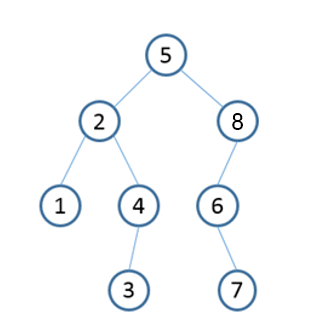

In [ ]:
class binaryTree(object):
    
    def __init__(self, value):
        self.value = value
        self.leftBranch = None
        self.rightBranch = None
        self.parent = None
    
    def setLeftBranch(self, node):
        self.leftBranch = node
    def setRightBranch(self, node):
        self.rightBranch = node
    def setParent(self, parent):
        self.parent = parent
        
    def getValue(self):
        return self.value
    def getLeftBranch(self):
        return self.leftBranch
    def getRightBranch(self):
        return self.rightBranch
    def getParent(self):
        return self.parent
    def __str__(self):
        return self.value

def DFSBinary(root, fcn):
    queue = [root]
    while len(queue) > 0:
        print('at node ' + str(queue[0].getValue()))
        if fcn(queue[0]):
            return True
        else:
            temp = queue.pop(0)
            if temp.getRightBranch():
                queue.insert(0, temp.getRightBranch())
            if temp.getLeftBranch():
                queue.insert(0, temp.getLeftBranch())
    return False

def BFSBinary(root, fcn):
    queue = [root]
    while len(queue) > 0:
        print('at node' + str(queue[0].getValue()))
        if fcn(queue[0]):
            return True
        else:
            temp = queue.pop(0)
            if temp.getLeftBranch():
                queue.append(temp.getLeftBranch())
            if temp.getRightBranch():
                queue.append(temp.getRightBranch())
    return False

n5 = binaryTree(5)
n2 = binaryTree(2)
n1 = binaryTree(1)
n4 = binaryTree(4)
n8 = binaryTree(8)
n6 = binaryTree(6)
n7 = binaryTree(7)
n3 = binaryTree(3)

n5.setLeftBranch(n2)
n2.setParent(n5)
n5.setRightBranch(n8)
n8.setParent(n5)
n2.setLeftBranch(n1)
n1.setParent(n2)
n2.setRightBranch(n4)
n4.setParent(n2)
n8.setLeftBranch(n6)
n6.setParent(n8)
n4.setLeftBranch(n3)
n3.setParent(n4)
n6.setRightBranch(n7)
n7.setParent(n6)

def find6(node):
    return node.getValue() == 6

print("DFS")
DFSBinary(n5, find6)
print("BFS")
BFSBinary(n5, find6)

<h1>4. traveling sales man</h1>

给定下列点坐标[[0, 84], [45, 53], [17, 53], [89, 5], [24, 66], [98, 35], [38, 18], [90, 89], [8, 12], [96, 47]]，求从一个点出发，每个点只走一遍，再回到起始的最短路程。并绘制最短路程图。

In [ ]:
import random, numpy, math, copy, matplotlib.pyplot as plt
cities = [[0, 84], [45, 53], [17, 53], [89, 5], [24, 66], [98, 35], [38, 18], [90, 89], [8, 12], [96, 47]]
tour = random.sample(range(10),10)

def dist(city1, city2):
    xDist = abs(city1[0] - city2[0])
    yDist = abs(city1[1] - city2[1])
    distance = math.sqrt(xDist**2 + yDist**2)
    return distance

def distChange(tour, new_way):
    distanceChange = 0
    for k in new_way:
        distanceChange += dist(cities[tour[(k+1)%10]], cities[tour[k]])
    return distanceChange

for temp in numpy.logspace(0, 5, num = 100000)[::-1]:
    [i, j] = sorted(random.sample(range(10), 2))
    newTour = copy.deepcopy(tour)
    newTour[i], newTour[j] = newTour[j], newTour[i]
    P = math.exp((distChange(tour,[j, j-1, i, i-1])) - distChange(newTour, [j, j-1, i, i-1]) / temp)
    
    if P > random.random():
        tour = copy.copy(newTour)
plt.plot([cities[tour[i%10]][0] for i in range(11)], [cities[tour[i%10]][1] for i in range(11)], 'xb-')

<h1>5. Read Book</h1>

从Book目录中读出所有的图书，并建立列表，列表的项目应当包括，语言，作者，名称，每本书单词总长度，不重复单词个数。根据所生成的表，绘制每种语言下，以总长度为x轴，不重复单词数为y轴的散点图。

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import time            
def count_words(text):
    """
    Count the number of times each word occurs in text(str). Return dictionary 
    where keys are unique words and values are word counts. Skip punctuation.
    """
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    for ch in skips:
        text = text.replace(ch, "")
        
    word_counts = Counter(text.split(" "))      
    return word_counts          


def read_book(title_path):
    """Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique,counts)

import os
book_dir = "./Books"

import pandas as pd
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
#            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1
            
plt.figure(figsize = (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "red")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "green")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blue")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("number of unique words")

plt.savefig("lang_plot.pdf")

        
            

<h1>6.</h1>	
假设墙厚0.1m，墙热扩散系数为1.0e-4，墙左边温度是40摄氏度，右边是20摄氏度，墙初始温度是0度，用有限差分法求解求从0时刻开始，到40秒时，墙沿厚度方向的温度分布曲线。

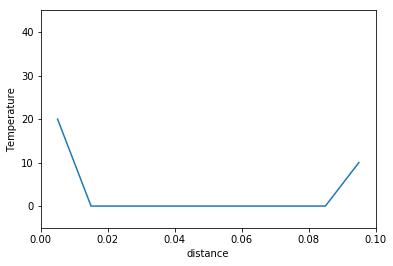

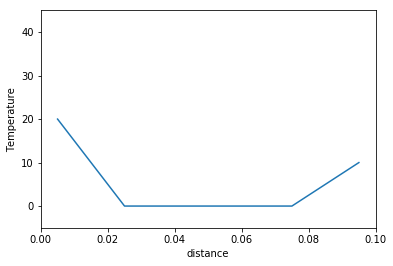

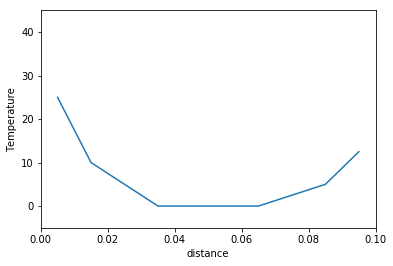

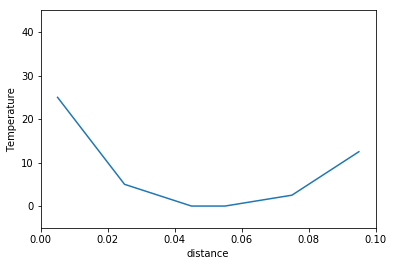

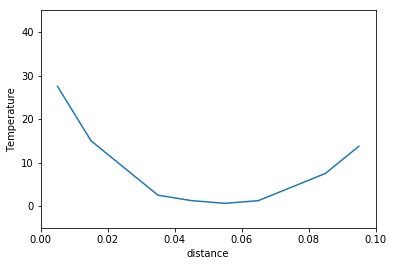

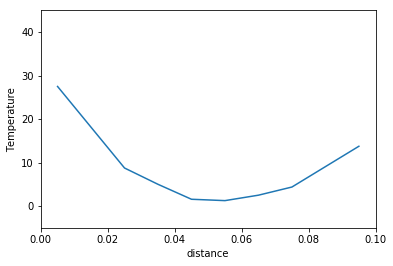

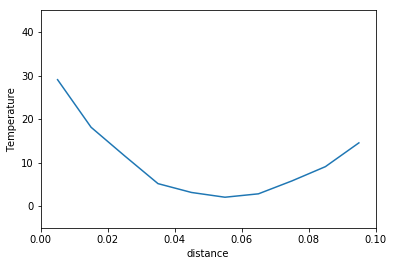

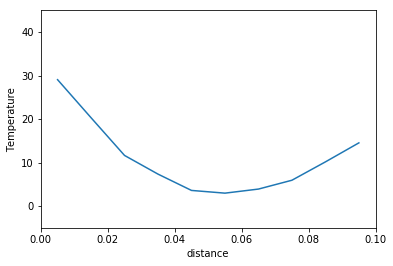

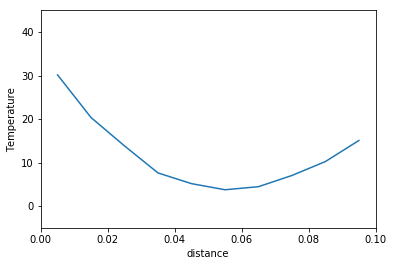

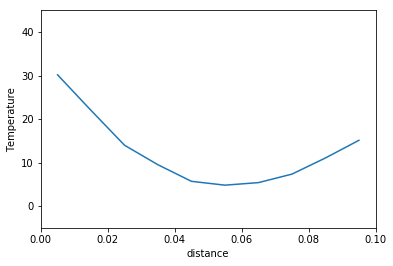

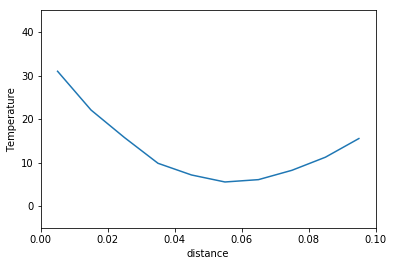

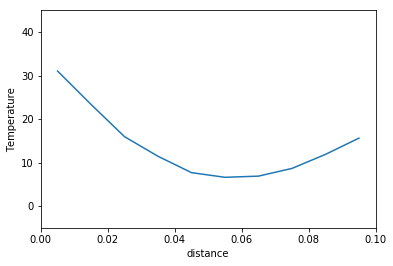

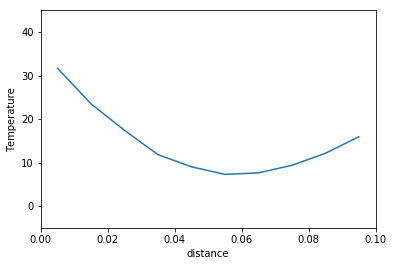

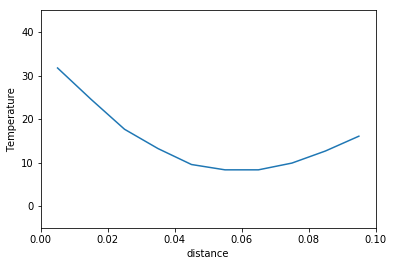

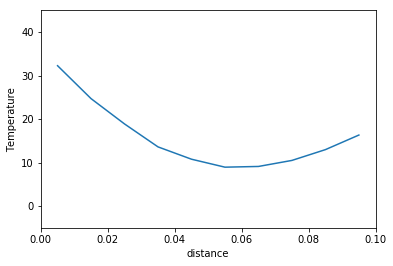

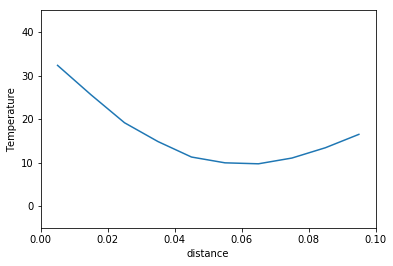

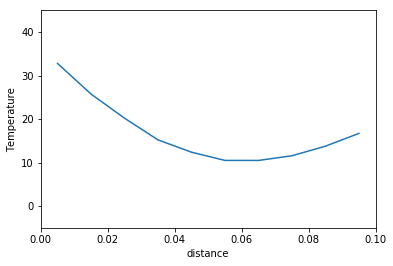

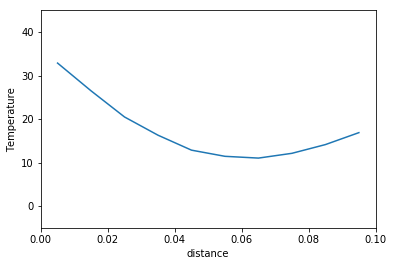

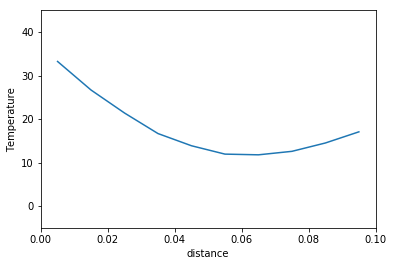

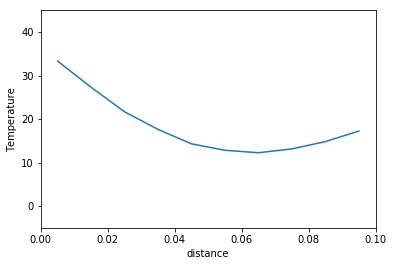

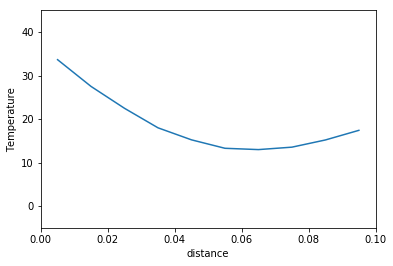

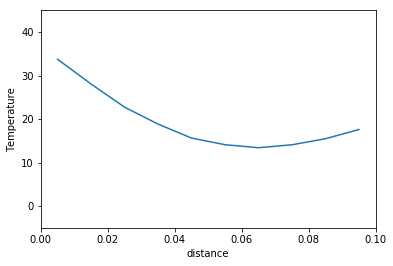

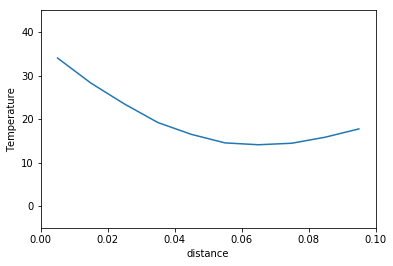

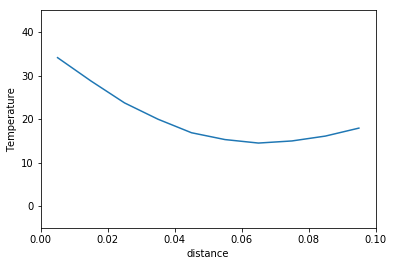

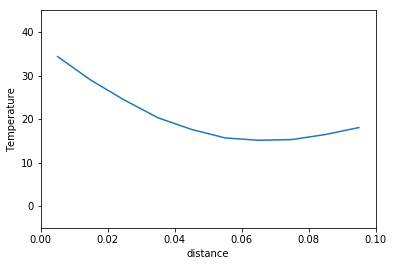

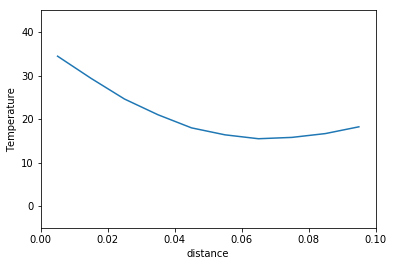

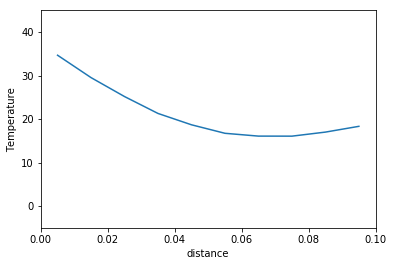

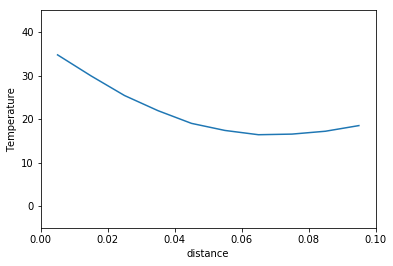

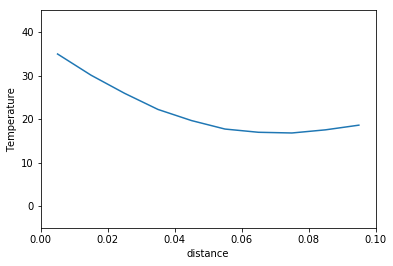

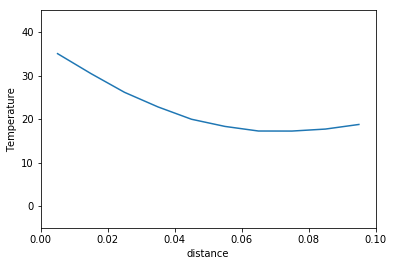

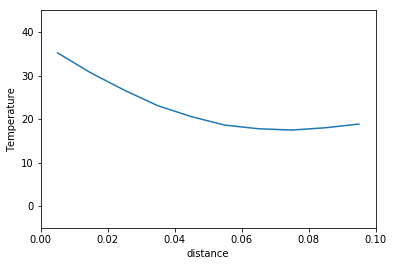

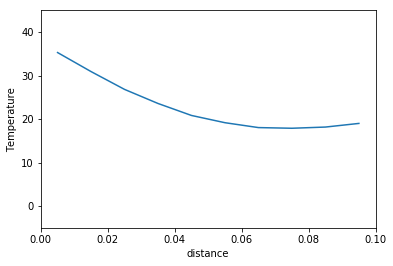

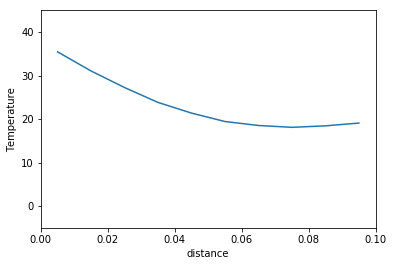

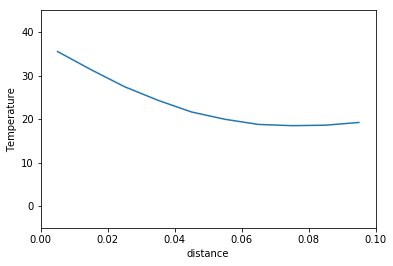

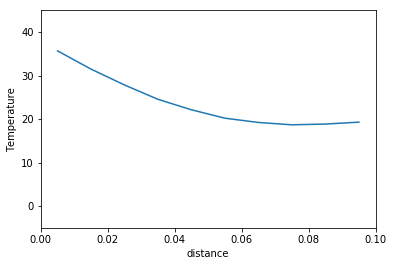

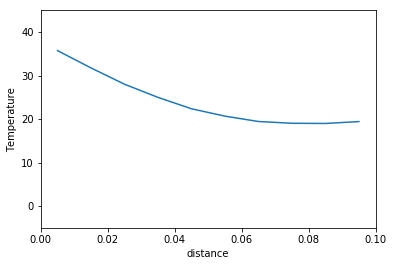

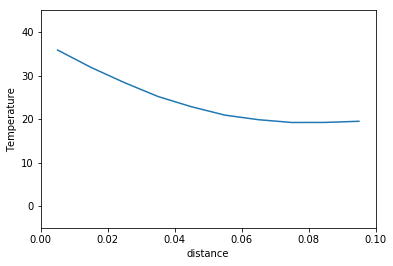

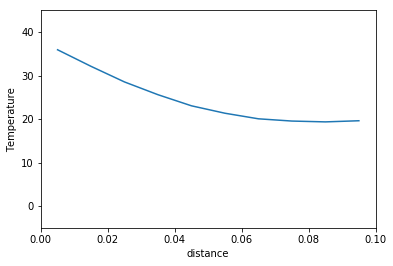

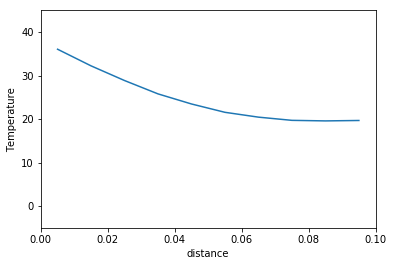

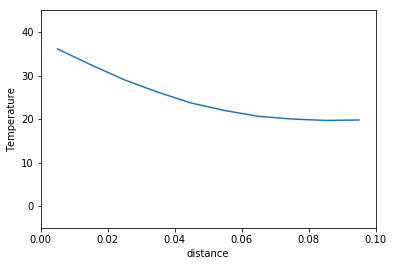

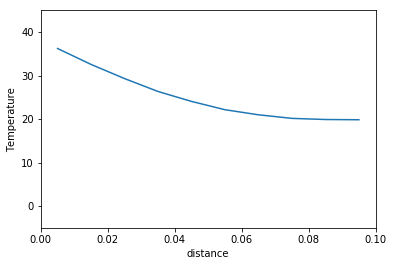

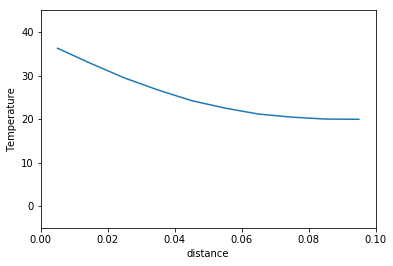

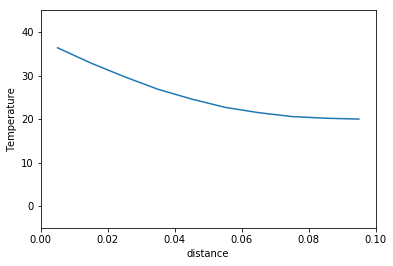

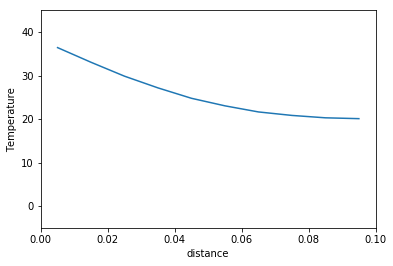

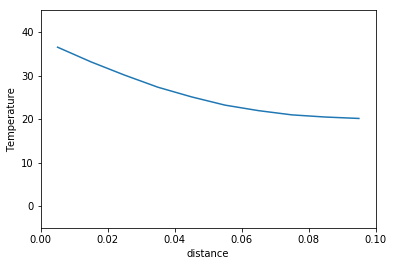

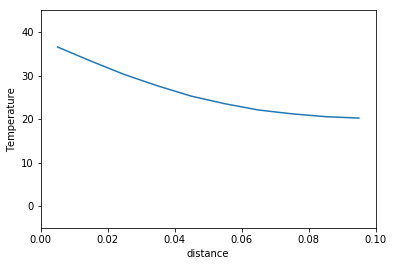

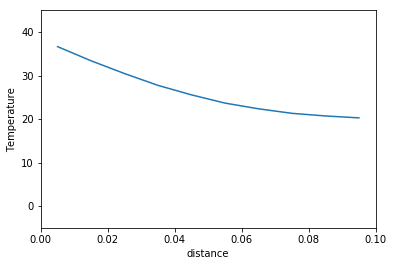

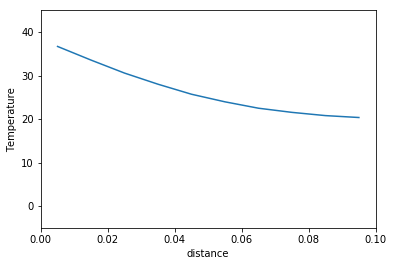

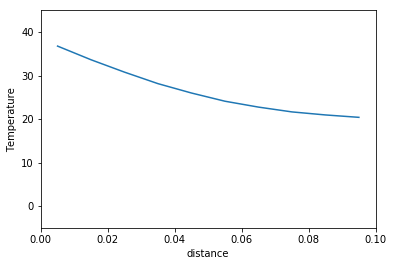

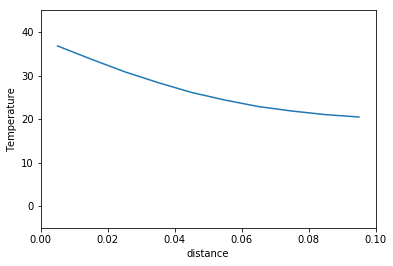

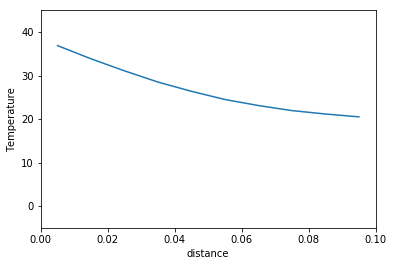

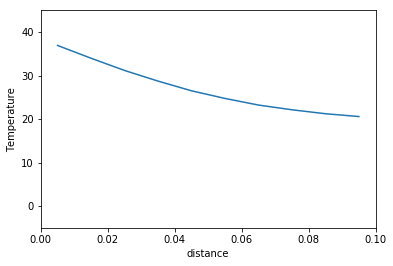

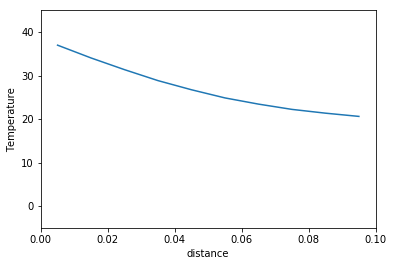

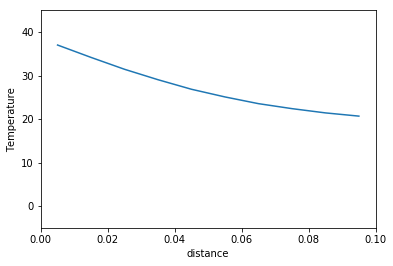

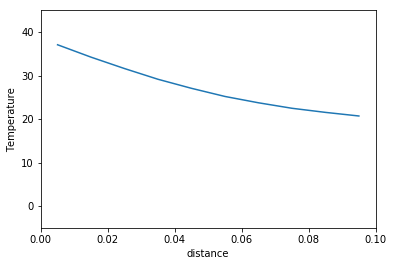

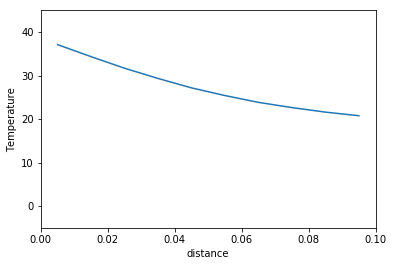

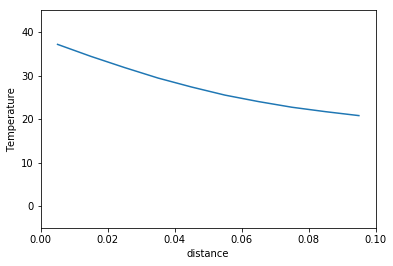

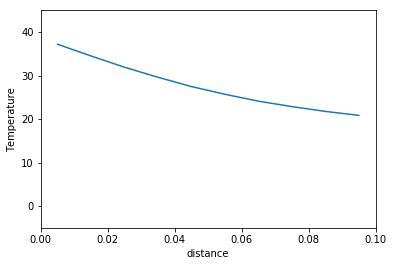

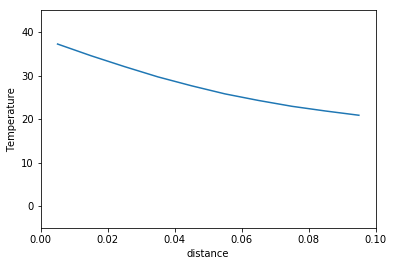

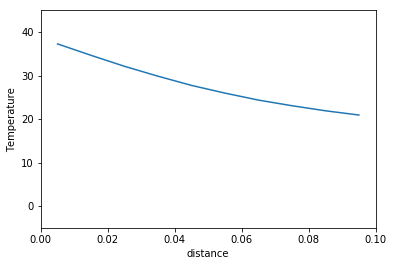

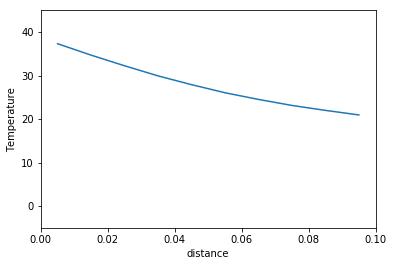

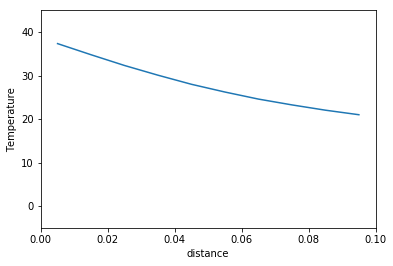

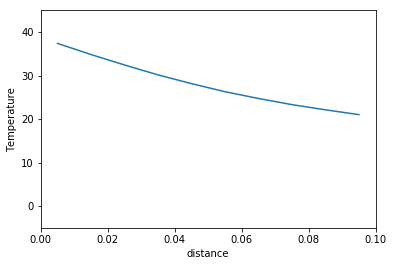

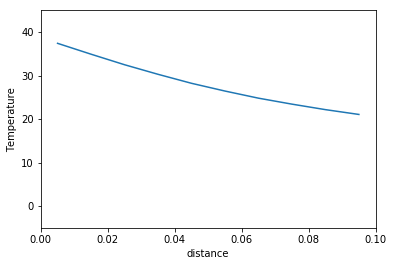

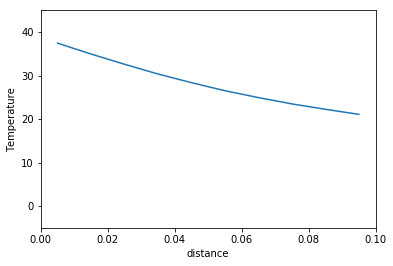

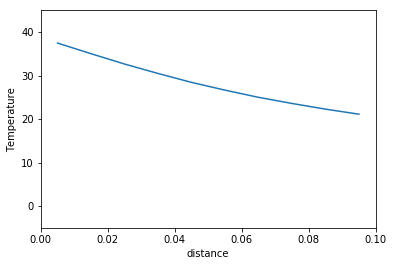

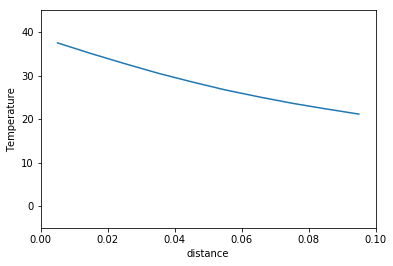

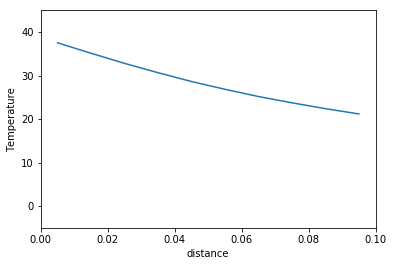

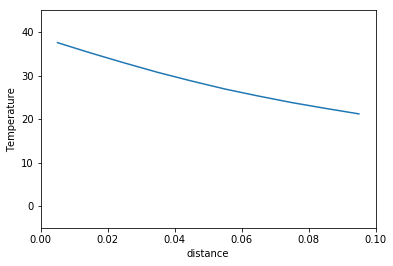

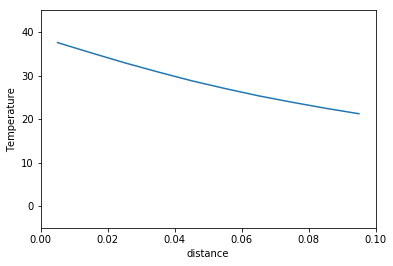

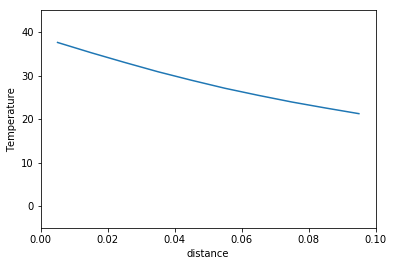

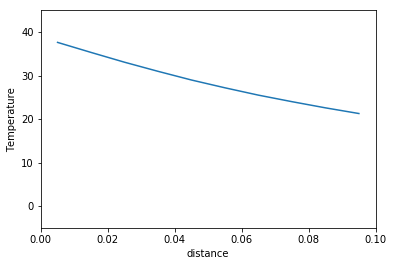

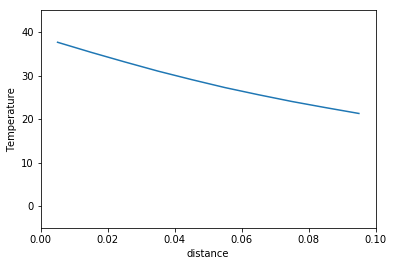

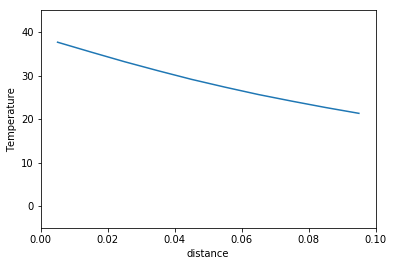

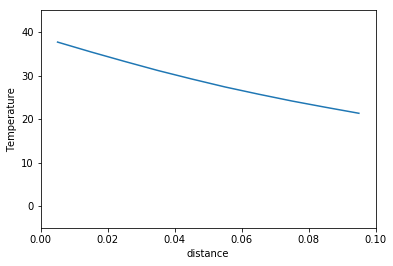

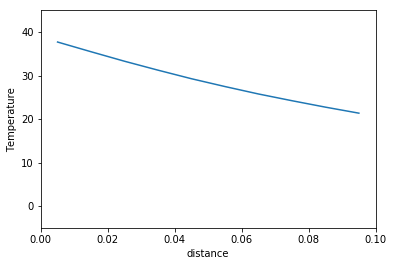

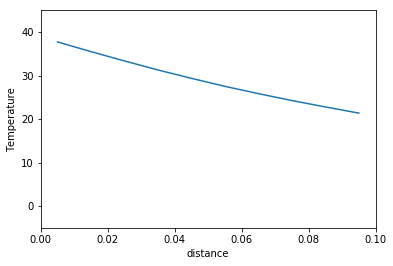

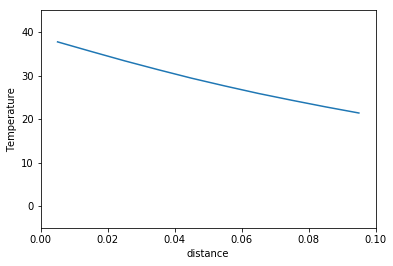

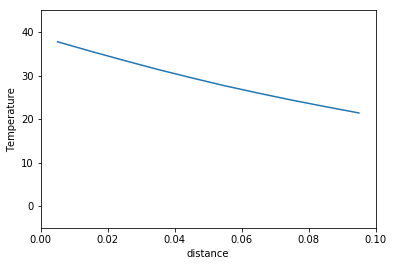

In [5]:
import numpy as np
import matplotlib.pyplot as plt
wall_th = 0.1
n = 10
T0 = 0
T1s = 40
T2s = 20
dx = wall_th/n

alpha = 0.0001
t_final = 40
dt = 0.5

x = np.linspace(dx/2, wall_th-dx/2, n)

T = np.ones(n)*T0
dTdt = np.empty(n)

t = np.arange(0, t_final, dt)

for j in range(1, len(t)):
    plt.clf()
    for i in range(1, n-1):
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2)
    dTdt[0] = alpha*(-(T[0]-T1s)/dx**2 + (T[1]-T[0])/dx**2)
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2 + (T2s-T[n-1])/dx**2)
    T = T + dTdt * dt
    plt.figure(1)
    plt.plot(x,T)
    plt.axis([0,wall_th,-5,45])
    plt.xlabel("distance")
    plt.ylabel("Temperature")
    plt.show()
    plt.pause(0.05)


<h1>6. VTK surface extract</h1>

In [2]:

import io, vtk, re

class node:
    count = 0
    
    def __init__(self, number, X, Y, Z):
        self.number = int(number.strip())
        self.X = float(X)
        self.Y = float(Y)
        self.Z = float(Z)
        node.count += 1
        
class tet4:
    count =0
    
    def __init__(self, number, node1, node2, node3, node4):
        self.number = int(number.strip())
        self.node1 = int(node1.strip())
        self.node2 = int(node2.strip())
        self.node3 = int(node3.strip())
        self.node4 = int(node4.strip())
        tet4.count += 1

f = open('demo.inp','r')   
data = f.readlines()

           
node_pattern = re.compile('\s*\d+\,\s*\-*\d+\.\d*E*\-*\d*\,\s*\-*\d+\.\d*E*\-*\d*\,\s*\-*\d+\.\d*E*\-*\d*\n')
tet4_pattern = re.compile('\s*\d+\,\s*\d+\,\s*\d+\,\s*\d+,\s*\d+\n')

node_list = []
tet4_list = []
#shell3_list = []

for line in data:
    if node_pattern.match(line):
        groups = line.split(',')
        node1 = node(groups[0],groups[1],groups[2],groups[3])
        node_list.append(node1)
    if tet4_pattern.match(line):
        groups = line.split(',')
        tet1 = tet4(groups[0],groups[1],groups[2],groups[3],groups[4])
        tet4_list.append(tet1)

        
print(node.count)
print(tet4.count)

      
def nodeReorder(node_list):
    i = 0
    node_num_order = {}
    for node in node_list:
        node_num_order[node.number] = i
        i += 1
    
    return node_num_order
        
node_ordered = nodeReorder(node_list)

#VTK insert points
points = vtk.vtkPoints()
print("adding nodes now.")
for node in node_list:
    points.InsertNextPoint(node.X, node.Y, node.Z)
    
#vtk generate mesh
mesh = vtk.vtkUnstructuredGrid()
tetra = vtk.vtkTetra()
cellarray = vtk.vtkCellArray()
for tet in tet4_list:
    tetra.GetPointIds().SetId(0, node_ordered[tet.node1])
    tetra.GetPointIds().SetId(1, node_ordered[tet.node2])
    tetra.GetPointIds().SetId(2, node_ordered[tet.node3])
    tetra.GetPointIds().SetId(3, node_ordered[tet.node4])
    cellarray.InsertNextCell(tetra)

mesh.SetPoints(points)
mesh.SetCells(vtk.VTK_TETRA, cellarray)

#extract surface
surface_filter = vtk.vtkDataSetSurfaceFilter()
surface_filter.SetInputData(mesh)
surface_filter.Update()
polydata = vtk.vtkPolyData()
polydata = surface_filter.GetOutput()

#output surface

i = 0
output = []
node_count = polydata.GetNumberOfPoints()
f = open('output.txt','w')
for i in range(node_count):
    point_tmp = polydata.GetPoint(i)
    f.writelines(str(point_tmp) + '\n')
f.close

65442
252564
adding nodes now.


<function TextIOWrapper.close()>